In [3]:
4//3

1

# Monday, September 18th, 2023

## Review

### What have we covered so far?

## Sep 6: 
- Python basics 
    - Data types: Integer (`int`), Float (`float`), String (`str`), Boolean (`bool`), Complex (`complex`)
    - Operations: Basic math ops, Boolean (comparisons, `and`, `or`), String (concatenation, multiplication)
    - Libraries (scipy.constants)
- Jupyter notebooks 
    - Lifecycle: creating, editing, running, saving, closing (in syzygy server)
    - Markdown vs Code cells
    - Raw data format *(not covered)*
- Git *(not covered)*
    - Simplest Lifecycle:
        1. Create a repo on github's website
        2. Copy the repo's url
        3. Clone the repo to your computer using git clone <url>
        4. Make changes to the repo
        5. Add the changes to the staging area using git add <filename>
        6. Commit the changes using git commit -m "message"
        7. Push the changes to the remote repo using git push
    - Setup an SSH key and clone using SSH.
    - Benefits of working in a repo are that you can easily revert to previous versions of your code, and you can collaborate with others on the same codebase.

## Sep 7:
- Basic calculation of free falling object example
- Number bases: Binary, Octal, Decimal, Hexadecimal
- Binary
- Fixed point number
- Floating point number 
    - Single precision
    - Double precision
- Rounding Errors

[From python documentation](https://docs.python.org/3/tutorial/floatingpoint.html)

''
On most machines, if Python were to print the true decimal value of the binary approximation stored for 0.1, it would have to display

```python
x = 0.1
print(x)

0.1000000000000000055511151231257827021181583404541015625
```
That is more digits than most people find useful, so Python keeps the number of digits manageable by displaying a rounded value instead

```python
x = 1 / 10
print(x)

0.1
```
Just remember, even though the printed result looks like the exact value of 1/10, the actual stored value is the nearest representable binary fraction.
''

Which is why it's not always important to worry about your result be 0 or 1e-9. It's more important to know that it's close to 0.

## Sep 11:
- Case study: Final size of an epidemic
- Importing libraries and functions from libraries
- Reading docstrings using `help()`
- Root finding with tangent lines
- `while` loop

Worthwhile revisiting the modelling for final size of epidemic.

```Java
Depending on your interests, you may want to spend some more time working on the number systems from Sep 7th or studying final size of epidemic from Sep 11th.
```

## Sep 13:
- Convergence of Newton's method
- `for` loop
- `if`, `elif`, and `else` statements
- Truncation error
- Root finding with secant line

## Sep 14:
- Python functions (defining, calling, arguments, default arguments, return values)
- Looking at root_scalar function from scipy.optimize for root finding

## Sep 18:
- What did we learn?
- Case study: Modelling epidemics (SIR)
- Python lists (indexing)
- Numpy arrays (like vectors)
- Numpy matrix

# 1. Slicing lists, arrays, and matrices

In [5]:
import numpy as np

X = np.matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
X

matrix([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [8]:
# slice second row of X

X[1, :]

matrix([[4, 5, 6]])

In [9]:
# slice first column of X

X[:, 0]

matrix([[1],
        [4],
        [7]])

the return is a numpy.matrix

# 2. Solving SIR model with scipy.integrate.solve_ivp

### Equations

$$\frac{dS}{dt} = -\frac{\beta S I}{N}$$

$$\frac{dI}{dt} = \frac{\beta S I}{N} - \gamma I$$

$$\frac{dR}{dt} = \gamma I$$

### Parameters

* $\beta$ is the average number of contacts per person per time, multiplied by the probability of disease transmission in a contact between a susceptible and an infectious subject.

* $\gamma$ is the removal rate, i.e. the average number of recovered or deceased people per time.

### Example

Let's assume that $\beta = 0.2$ and $\gamma = 0.1$.

In [10]:
beta = 0.2
gamma = 0.1

def dS(S, I):
    return -beta*S*I

def dI(S, I):
    return beta*S*I - gamma*I

def dR(I):
    return gamma*I

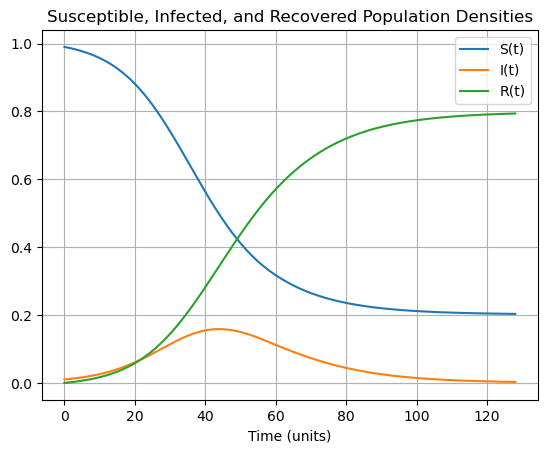

In [14]:
from scipy.integrate import solve_ivp
from matplotlib.pyplot import plot, legend, grid, xlabel, title, figure

def SIR(t, y):
    S, I, R = y
    return [dS(S, I), dI(S, I), dR(I)]

y0 = [0.99, 0.01, 0]
t = np.linspace(0, 128, 1000)

sol = solve_ivp(SIR, [0, 128], y0, t_eval=t)

figure()
title('Susceptible, Infected, and Recovered Population Densities')
xlabel('Time (units)')
plot(sol.t, sol.y[0], label='S(t)')
plot(sol.t, sol.y[1], label='I(t)')
plot(sol.t, sol.y[2], label='R(t)')
grid()
legend()